# Graphic Transfomation

In [2]:
import io
import base64

import numpy as np  # type: ignore

from PIL import Image
import cv2 as cv  # type: ignore

import matplotlib.pyplot as plt  # type: ignore
import plotly.io as pio
import plotly.express as px  # type: ignore
import plotly.graph_objects as go  # type: ignore
import dash
from dash import dcc, html
import seaborn as sns  # type: ignore

import config

In [3]:
def image_to_base64(image):
    # 将图像从 NumPy 数组转换为 PIL 图像
    pil_img = Image.fromarray(cv.cvtColor(image, cv.COLOR_BGR2RGB))

    # 将 PIL 图像保存到内存缓冲区，并获取其 Base64 编码
    buffer = io.BytesIO()
    pil_img.save(buffer, format="PNG")
    img_bytes = buffer.getvalue()
    return base64.b64encode(img_bytes).decode("ascii")

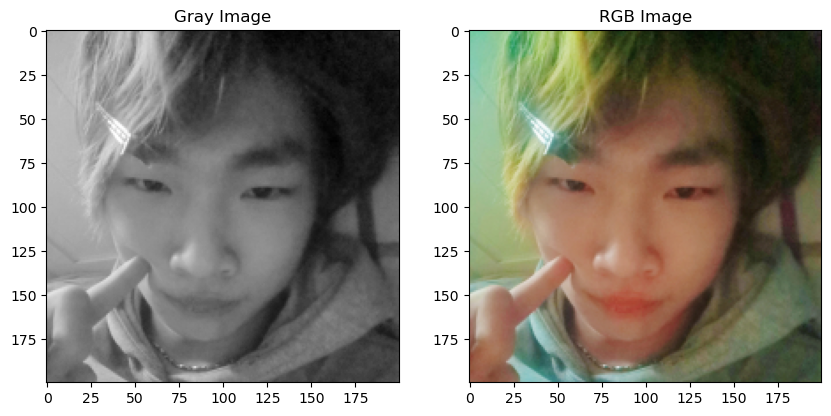

In [4]:
# 导入图像
img = cv.imread(config.TEST_IMAGE)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 窗口显示图像
# cv.imshow("cutebuzhen", img)
# k = cv.waitKey(0)

# 显示图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.title("Gray Image")
plt.imshow(img_gray, cmap="gray")
plt.subplot(1, 2, 2), plt.title("RGB Image")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

plt.show()

In [5]:
px.imshow(img_gray, color_continuous_scale="gray").show()

In [6]:
# 转换为 Base64
img_base64 = image_to_base64(img)

In [13]:
# 图像尺寸
height, width = img_gray.shape

# 生成 X 和 Y 坐标
x = np.arange(width)
y = np.arange(height)
x, y = np.meshgrid(x, y)

# 将灰度值作为 Z 坐标
z = np.zeros_like(img_gray)

# 创建 3D 图形
fig = go.Figure(
    data=[
        go.Surface(
            z=z, x=x, y=y, surfacecolor=img_gray, colorscale="gray", showscale=False
        )
    ]
)


# 更新布局
fig.update_layout(
    title="在三维坐标中展示图像",
    scene=dict(
        xaxis_title="X 轴",
        yaxis_title="Y 轴",
        zaxis_title="像素值",
        camera=dict(eye=dict(x=0, y=0, z=-1)),
    ),
    width=800,
    height=800,
)

fig.show()

## Affine Transfomation

旋转

## Shear 剪切变换


## 镜像变换


In [8]:
# 透视变换
